## Overview

Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff. The amount of financial data on the web is seemingly endless. A large and well structured dataset on a wide array of companies can be hard to come by.

This dataset is a part of DJIA Stock time series datset from kaggle. The dataset can be found [here](https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231)

The script used to acquire all of the following data can be found in this [GitHub repository](https://github.com/szrlee/Stock-Time-Series-Analysis/blob/master/data_collection.ipynb). This repository also contains the modeling codes and will be updated continually, so welcome starring or watching!

This dataset contains the historical stock prices (last 12 years) for 29 of 30 DJIA companies (excluding 'V' because it does not have the whole 12 years data).

      ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 'GE',

      'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE',

      'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT', 'GOOGL', 'AMZN', 'AABA']
      


I have specifically selected the **Microsoft Stock dataset** to work on.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

######   

## Data Collection

In [2]:
raw_data = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', parse_dates = True, index_col = 'Date')
raw_data.head()

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

## Data description

In [3]:
data = raw_data.copy()

In [4]:
data.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     36.496817    36.827903    36.173190    36.513412  5.161762e+07
std      14.683337    14.742483    14.620057    14.694656  3.114958e+07
min      15.200000    15.620000    14.870000    15.150000  7.425603e+06
25%      26.785000    27.045000    26.535000    26.835000  3.136557e+07
50%      29.990000    30.230000    29.780000    30.000000  4.617529e+07
75%      44.545000    44.980000    44.090000    44.400000  6.322291e+07
max      87.120000    87.500000    86.230000    86.850000  5.910786e+08

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


######    

## Data Exploration and Visualization

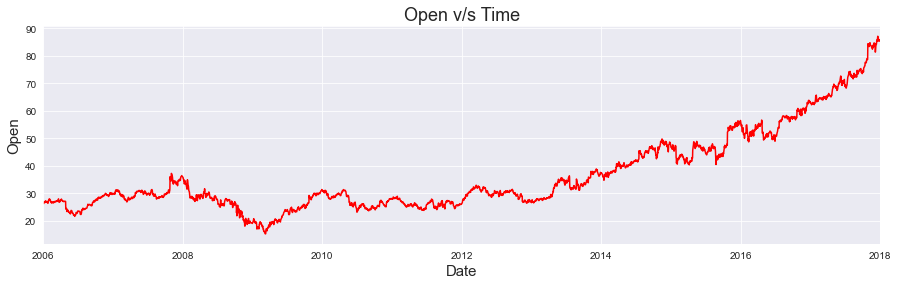

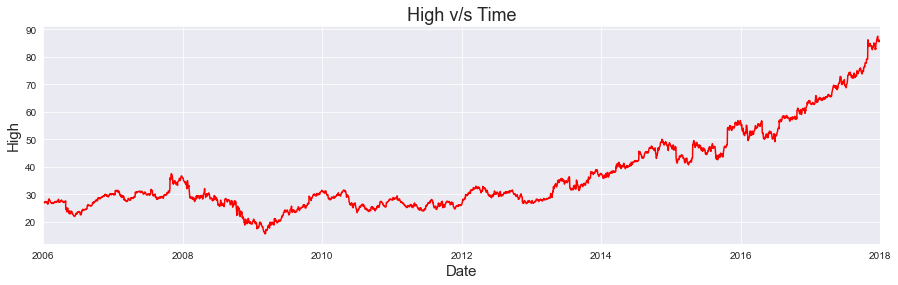

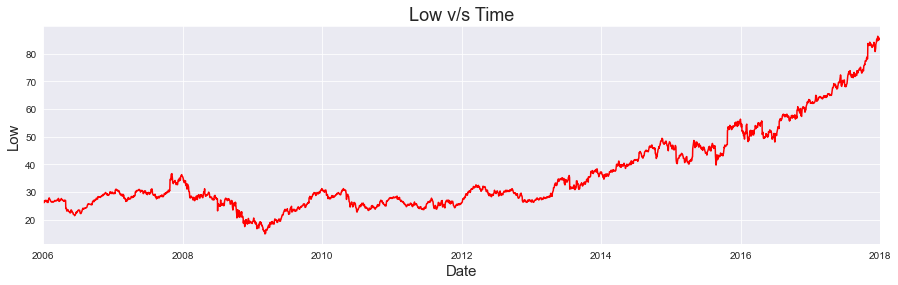

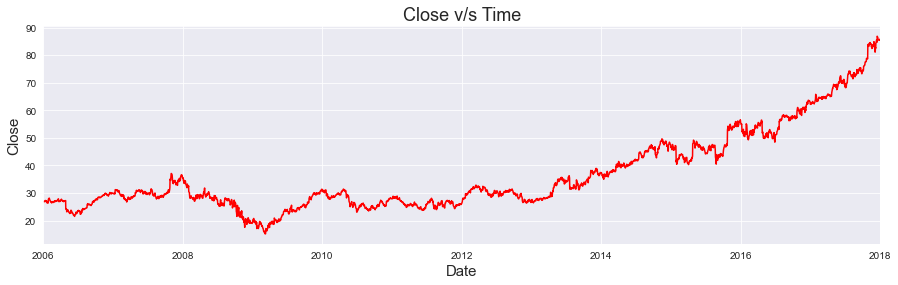

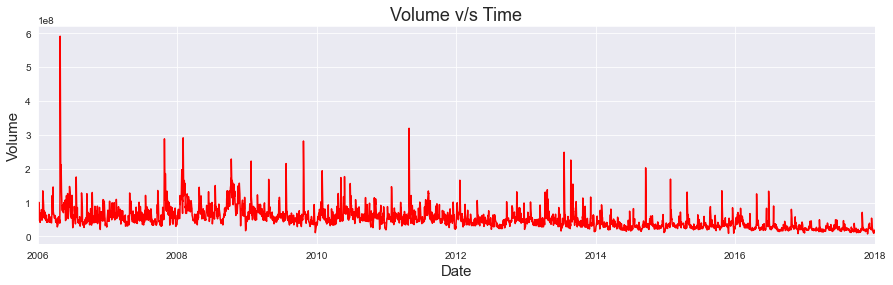

In [6]:
cols = data.drop(['Name'],axis = 1).columns.values

for x in cols:
    
    plt.figure(figsize=(15,4))
    plt.plot(data[x], 'r')
    plt.xlabel('Date', fontsize = 15)
    plt.xlim('2006','2018')
    plt.ylabel(x, fontsize = 15)
    plt.title(x + ' v/s Time', fontsize = 18)
    plt.show()

#### There is minor change in the opening and closing price of stock. But after 2012 they seem to be increasing exponentially. Also the  difference between maximum(High) and minimum(Low) price of stock is very low though they too show an increasing trend after 2012.

#### However , it is seen that the Microsoft had the highest volume activity in 2006. Let's find out the exact date and Volume.

In [7]:
data['Volume'].max()

591078581

In [8]:
data[data['Volume'] == 591078581]

Open  High   Low  Close     Volume  Name
Date                                                 
2006-04-28  24.23  24.5  24.0  24.15  591078581  MSFT

**So the highest volume rise was recorded on 28th April 2006.**

######  

### Distribution of different features

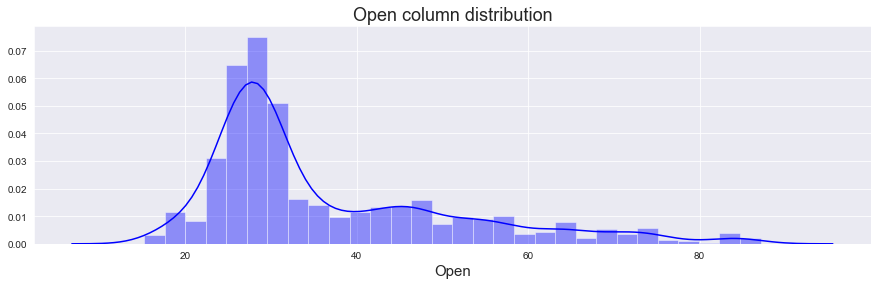

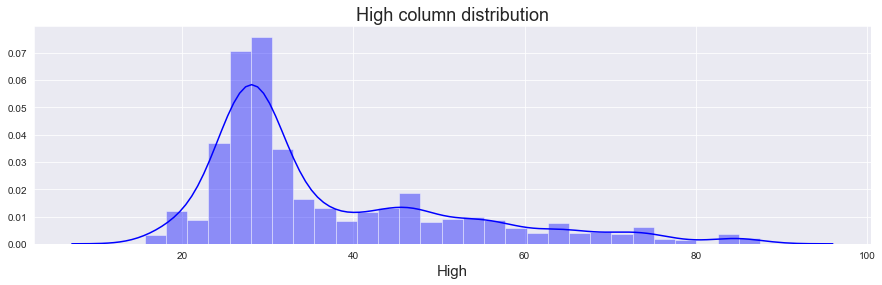

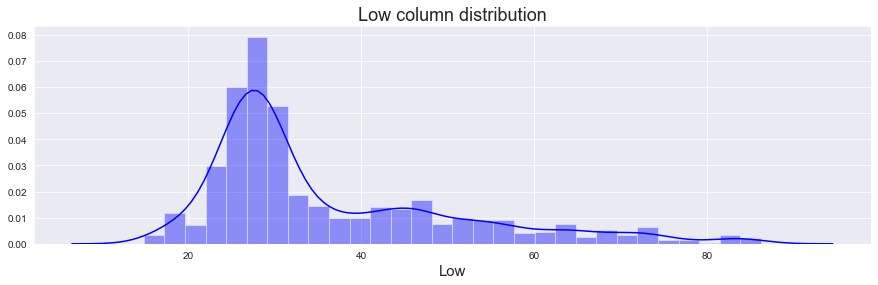

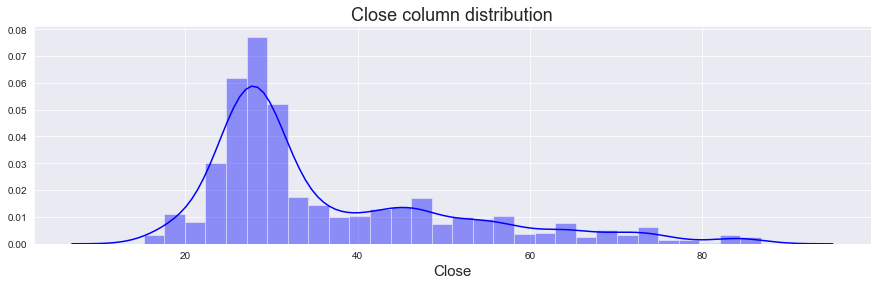

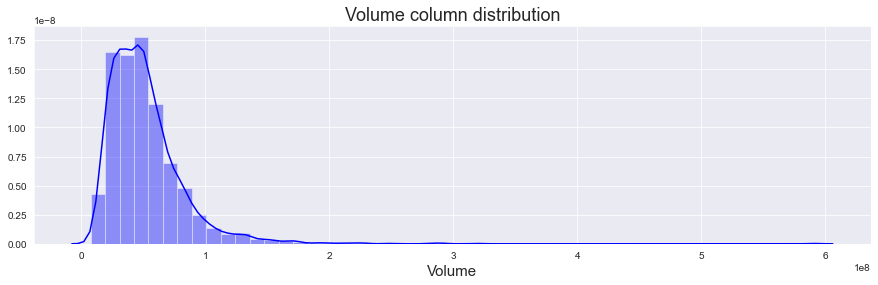

In [9]:
cols = data.drop('Name',axis = 1).columns.values

for x in cols:
    
    plt.figure(figsize=(15,4))
    sns.distplot(data[x], color = 'blue' )
    plt.xlabel(x, fontsize = 15)
    plt.title(x + ' column distribution', fontsize = 18)
    plt.show()

#### The opening and closing price of stock mostly ranges between 20 and 40 dollars. The same goes for highest and lowest price of stock as well.

#### The volume sales activity ranges mostly between 0.1 to 1.5 billion.

#####    

### Moving Averages

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.

You can refer to this [link](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp#:~:text=The%20moving%20average%20(MA)%20is,time%20period%20the%20trader%20chooses.) for more understanding of the concept.

The biggest rise in stock prices seems to be after 2016.

Let's explore the moving averages for each feature from 2016 to 2018. We will calculate on a monthly basis.

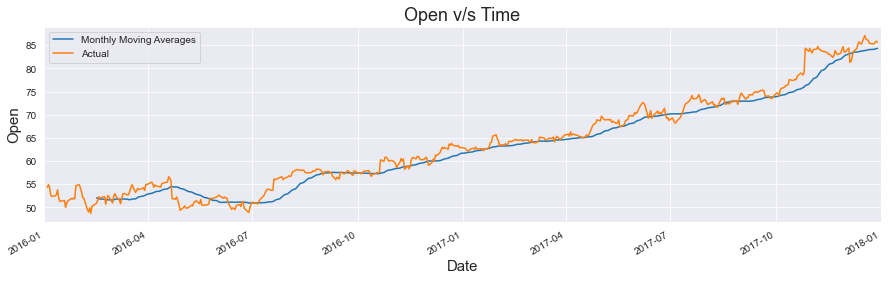

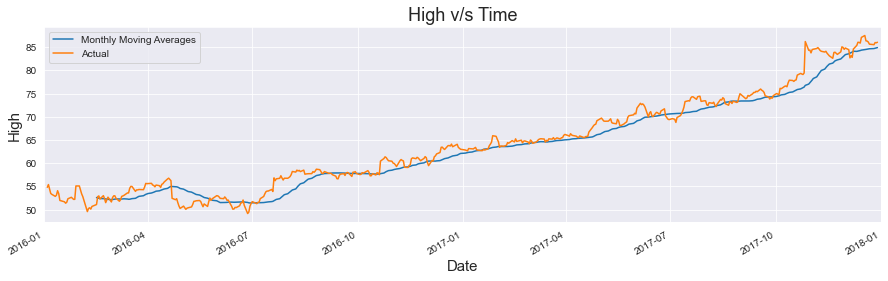

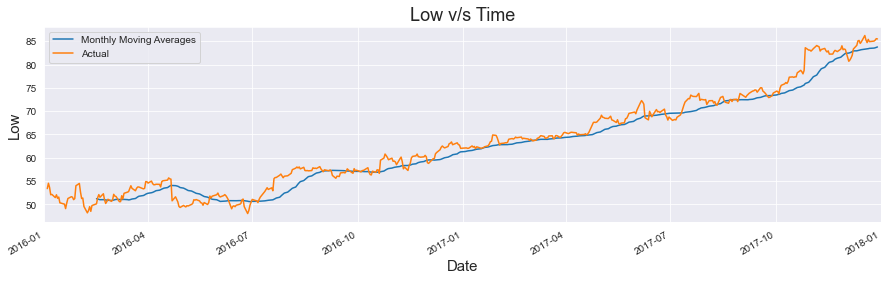

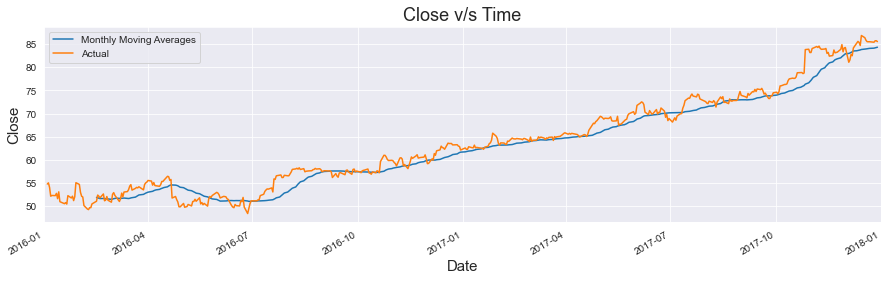

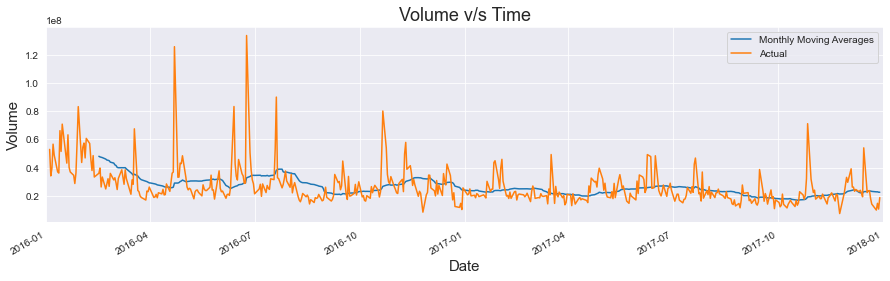

In [10]:
cols = data.drop('Name',axis = 1).columns.values

for x in cols:
    
    plt.figure(figsize=(15,4))
    data[x].loc['2016':'2018'].rolling(window = 30).mean().plot(label = 'Monthly Moving Averages') #window = 30 means 1 month
    data[x].loc['2016':'2018'].plot(label = 'Actual')
    plt.xlabel('Date', fontsize = 15)
    plt.xlim('2016','2018')
    plt.ylabel(x, fontsize = 15)
    plt.title(x + ' v/s Time', fontsize = 18)
    plt.legend()
    plt.show()

######   

### Plotly visualizations

Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

If you are interested in learning plotly basics, refer to [this youtube chanel](https://www.youtube.com/watch?v=j0wvKWb337A&list=PLE50-dh6JzC4onX-qkv9H3HtPbBVA8M94).

In [11]:
import plotly
import plotly.graph_objs as go

from plotly.offline import iplot

In [12]:
#Extracting data only for the last 2 years, i.e 2016 to 2018

data_2016_2018 = data.loc['2016-01-01':'2018-01-01']

**For Open and Close feature**

In [13]:
#First need to create a trace for our data

#Trace for Open
trace_1 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Open'],
    opacity = 0.8,
    name  = 'Opening Price'
    )

#Trace for moving average of Open
trace_2 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Open'].rolling(window = 30).mean(),
    opacity = 0.8,
    name  = 'Moving average for opening price'
    )

#Trace for Close
trace_3 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Close'],
    opacity = 0.8,
    name = 'Closing Price'
    )

#Trace for moving average of Close
trace_4 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Close'].rolling(window = 30).mean(),
    opacity = 0.8,
    name  = 'Moving average for closing price'
    )


#Creating a layout for labeling and other informations on the graph
layout = go.Layout(
    title = 'Stock prices chart for Opening and Closing prices of stock',
    showlegend = True
    )

data_open_close = [trace_1, trace_2, trace_3, trace_4]

figure = go.Figure(data = data_open_close, layout=layout)

#For plotting , iplot() is used
iplot(figure)

**For High and Low feature**

In [14]:
#First need to create a trace for our data

#Trace for High
trace_1 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['High'],
    opacity = 0.8,
    name  = 'Highest stock Price'
    )

#Trace for moving average of High
trace_2 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['High'].rolling(window = 30).mean(),
    opacity = 0.8,
    name  = 'Moving average for highest price'
    )

#Trace for Low
trace_3 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Low'],
    opacity = 0.8,
    name = 'Lowest stock price'
    )

#Trace for moving average of Close
trace_4 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Low'].rolling(window = 30).mean(),
    opacity = 0.8,
    name  = 'Moving average for lowest price'
    )


#Creating a layout for labeling and other informations on the graph
layout = go.Layout(
    title = 'Stock prices chart for Highest and Lowest prices of stock',
    showlegend = True
    )

data_high_low= [trace_1, trace_2, trace_3, trace_4]

figure = go.Figure(data = data_high_low, layout=layout)

#For plotting , iplot() is used
iplot(figure)

**For Volume feature**

In [15]:
#Trace for Volume
trace_1 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Volume'].values,
    opacity = 0.8,
    name = 'Volume of stocks'  
    )

#Trace for moving average of Volume
trace_2 = go.Scatter(
    x = data_2016_2018.index,
    y = data_2016_2018['Volume'].rolling(window = 30).mean(),
    opacity = 0.8,
    name  = 'Moving average for Volume'
    )

#Creating a layout for labeling and other informations on the graph
layout = go.Layout(
    title = 'Stock prices chart for Volume of stock',
    showlegend = True
    )

data_vol= [trace_1, trace_2]

figure = go.Figure(data = data_vol, layout=layout)

#For plotting , iplot() is used
iplot(figure)

## Model Building

#### Importing data

In [47]:
data = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', parse_dates =True, index_col = 'Date')

### Splitting data into train , validation and test set

#### Setting count values for train , validation and test so that the split can be done using these indexes. We will use 80% for train , 10% for validation and 10% for test data

In [49]:
# We won't need the Name column 

data = data.drop('Name', axis = 1)

In [50]:
train_count = int(0.8*len(data))

validation_count = int(0.1*len(data))

test_count = int(0.1*len(data)) # We actually won't be needing the test count

In [51]:
train = data[ : train_count] #80% test data collected

validation = data[train_count : train_count+validation_count] #10% validation data collected

test = data[train_count+validation_count : ] #Last remaining data is used as test data

######  

### Scaling the data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(train)

val_scaled = scaler.transform(validation)

test_scaled = scaler.transform(test)